In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/media-campaign-cost-prediction/train_dataset.csv
/kaggle/input/media-campaign-cost-prediction/test_dataset.csv


# Inputting Data

In [41]:
test_df = pd.read_csv("/kaggle/input/ml-lab-2/test.csv")
train_df = pd.read_csv("/kaggle/input/ml-lab-2/train.csv")
train_df.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [42]:
test_df

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,360336,7.24,4.0,1.0,0.0,2.0,10.80,0.0,1.0,7.0,20319.0,0.0,0.0,0.0,0.0,0.0
1,360337,6.90,2.0,2.0,2.0,3.0,8.51,1.0,0.0,4.0,33858.0,1.0,0.0,1.0,1.0,1.0
2,360338,8.34,3.0,0.0,0.0,3.0,8.77,0.0,1.0,14.0,39696.0,0.0,0.0,1.0,1.0,0.0
3,360339,5.48,2.0,3.0,3.0,2.0,21.90,1.0,0.0,9.0,23688.0,1.0,1.0,1.0,1.0,1.0
4,360340,4.80,3.0,2.0,0.0,2.0,10.90,1.0,0.0,11.0,27694.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240219,600555,8.60,4.0,0.0,0.0,1.0,8.39,0.0,0.0,16.0,38382.0,0.0,0.0,0.0,0.0,0.0
240220,600556,4.30,2.0,2.0,0.0,4.0,7.88,1.0,0.0,4.0,30268.0,0.0,0.0,0.0,0.0,0.0
240221,600557,6.30,3.0,0.0,0.0,3.0,11.50,0.0,0.0,13.0,39696.0,0.0,0.0,1.0,1.0,0.0
240222,600558,7.94,2.0,0.0,0.0,2.0,8.33,1.0,0.0,8.0,23759.0,1.0,0.0,1.0,1.0,1.0


In [43]:
cols_with_missing = [col for col in train_df.columns
                     if train_df[col].isnull().any()]
print(cols_with_missing)

[]


In [44]:
train_df.shape

(360336, 17)

In [45]:
train_df.info

<bound method DataFrame.info of             id  store_sales(in millions)  unit_sales(in millions)  \
0            0                      8.61                      3.0   
1            1                      5.00                      2.0   
2            2                     14.08                      4.0   
3            3                      4.02                      3.0   
4            4                      2.13                      3.0   
...        ...                       ...                      ...   
360331  360331                      7.60                      4.0   
360332  360332                     14.44                      4.0   
360333  360333                     10.74                      3.0   
360334  360334                     11.04                      3.0   
360335  360335                      5.30                      2.0   

        total_children  num_children_at_home  avg_cars_at home(approx).1  \
0                  2.0                   2.0                   

In [46]:
y = train_df.cost

In [48]:
X = train_df.copy()
X.pop("id")
y = X.pop("cost")

for col in X.select_dtypes("object"):
    X[col],_ = X[col].factorize()
    
discrete_features = X.dtypes == int
discrete_features

store_sales(in millions)      False
unit_sales(in millions)       False
total_children                False
num_children_at_home          False
avg_cars_at home(approx).1    False
gross_weight                  False
recyclable_package            False
low_fat                       False
units_per_case                False
store_sqft                    False
coffee_bar                    False
video_store                   False
salad_bar                     False
prepared_food                 False
florist                       False
dtype: bool

# **Feature Engineering**

In [49]:
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores


store_sqft                    2.705542
florist                       0.629244
prepared_food                 0.610903
salad_bar                     0.606731
coffee_bar                    0.595943
video_store                   0.519549
total_children                0.119234
avg_cars_at home(approx).1    0.089343
num_children_at_home          0.086080
unit_sales(in millions)       0.081755
store_sales(in millions)      0.027570
recyclable_package            0.001411
units_per_case                0.000345
gross_weight                  0.000000
low_fat                       0.000000
Name: MI Scores, dtype: float64

We can see that gross_weight and low_fat has 0 mutual information with the cost

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


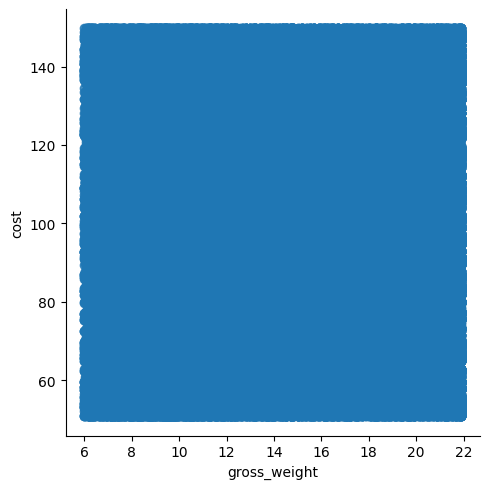

In [50]:
import seaborn as sns

sns.lmplot(x="gross_weight",y="cost",data=train_df)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


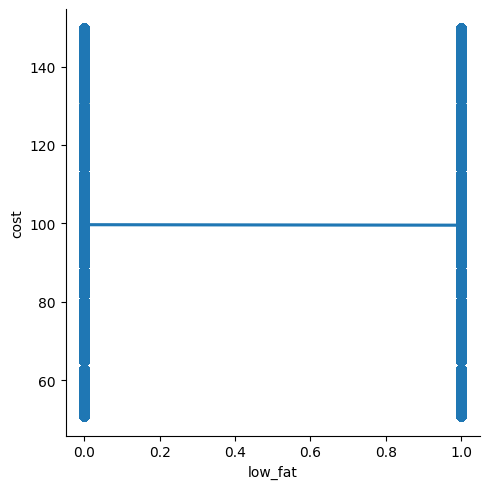

In [51]:
sns.lmplot(x="low_fat",y="cost",data=train_df)

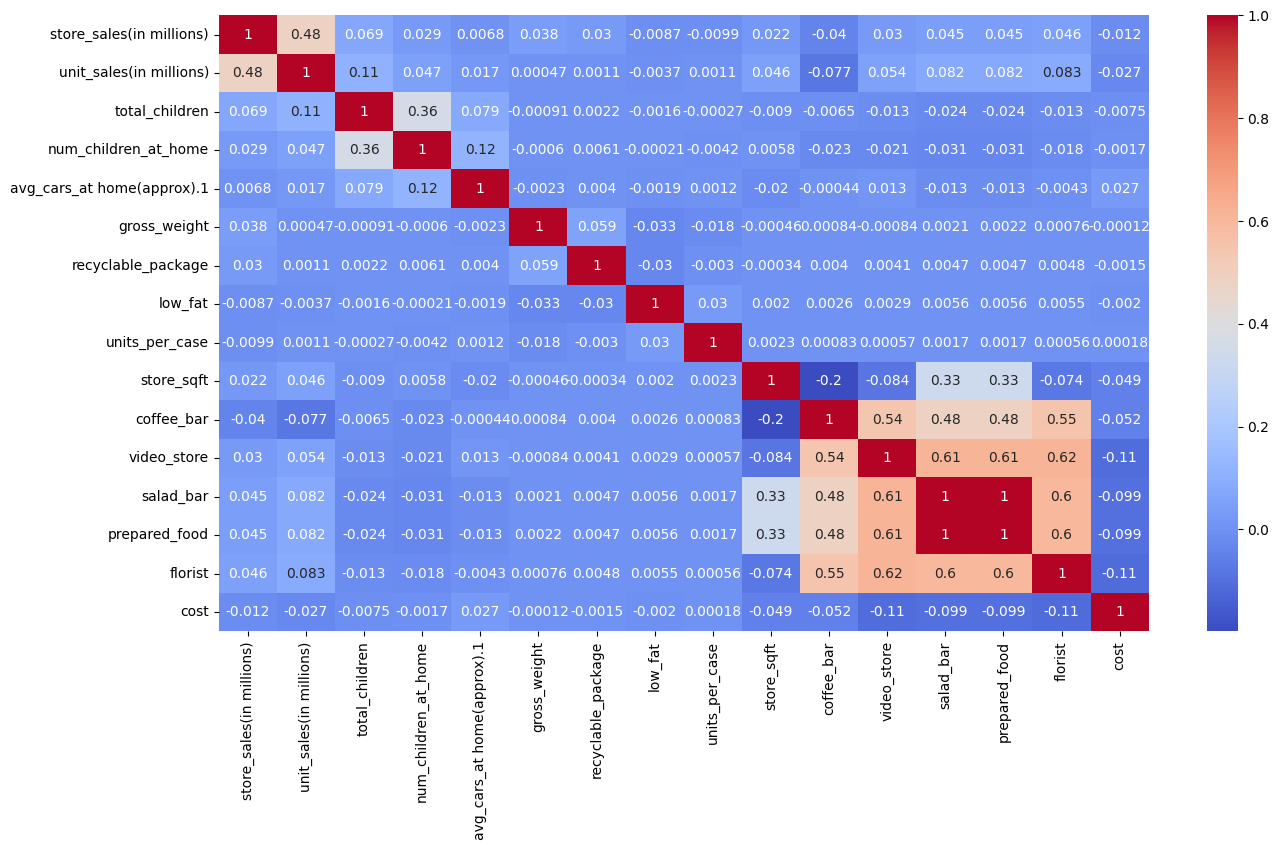

In [55]:
import matplotlib.pyplot as plt

train_data = train_df.copy()
train_data.pop("id")
correlation_matrix = train_data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [56]:
correlation_data = correlation_matrix.unstack().sort_values(ascending=False,key=abs)["cost"]
correlation_data.pop("cost")
correlation_data


florist                      -0.110414
video_store                  -0.106786
prepared_food                -0.098843
salad_bar                    -0.098810
coffee_bar                   -0.052086
store_sqft                   -0.049201
avg_cars_at home(approx).1    0.027098
unit_sales(in millions)      -0.026509
store_sales(in millions)     -0.012387
total_children               -0.007482
low_fat                      -0.001975
num_children_at_home         -0.001727
recyclable_package           -0.001455
units_per_case                0.000180
gross_weight                 -0.000116
dtype: float64

By Mutual Information we found that "gross_weight" and "units_pers_case" has 0 mutual information with the label. In above also we can see that they have a very low correlation value with the target variable. Therefore we can remove that two features also.

And both "prepared_food" and "salad_bar" have the same correlation. Therefore we can use only one of them. According to the mutual information values we can select "prepared_food" feature and omit the "salad_bar" feature.

According to the above data we can select the eight most important features.

In [57]:
features = ["florist","video_store","prepared_food","coffee_bar","store_sqft","avg_cars_at home(approx).1","unit_sales(in millions)","total_children"]

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(train_df[features],train_data.cost,random_state=100)



# Hyper Parameter Tuning

In [16]:
from sklearn.model_selection import GridSearchCV

def tune_parameters_and_get_model(model, param_grid, x_train, y_train):
    grid = GridSearchCV(model,param_grid=param_grid)
    grid.fit(x_train,y_train)
    return grid

# Training and tuning the Model

# RandomForest Regressor

In [50]:
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor

params = {
    'n_estimators': [100,200,300,400,500,600],
    'max_depth' : [2,4,6,7,8,10,15],
    'max_features':[5,6,7,8]
}

model = RandomForestRegressor(random_state=42)
model = tune_parameters_and_get_model(model,params,X_train,Y_train)
print("Best parameters: ",model.best_params_)
preds_val = model.predict(X_test)
mae = mean_absolute_error(Y_test, preds_val)
print("Absoulte mean error: ",mae)
r2s = r2_score(Y_test,preds_val)
print("R Squared: ",r2s)


Best parameters:  {'max_depth': 10, 'max_features': 5, 'n_estimators': 600}
Absoulte mean error:  24.93758946962355
R Squared:  0.06313160697158537


In [17]:
rfg_best_params =  {'max_depth': 10, 'max_features': 5, 'n_estimators': 600}

# XGBoost Regressor

In [53]:
from xgboost import XGBRegressor

params = {
    'learning_rate': [0.05,0.1,0.15,0.2],
    'max_depth' : [1,2,3,4,5,7,8,9,10],
    'n_estimators':[50,100,150,200,250,300,350,400]
}

xgb_model = XGBRegressor(random_state=42,objective='reg:squarederror')

optimized_model = tune_parameters_and_get_model(xgb_model,params,X_train,Y_train)
print("Best parameters: ",optimized_model.best_params_)
predictions = optimized_model.predict(X_test)
mae = mean_absolute_error(predictions, Y_test)
print("Mean Absolute Error: " , mae)
r2s = r2_score(Y_test,predictions)
print("R Squared: ",r2s)

Best parameters:  {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 150}
Mean Absolute Error:  24.91678800560457
R Squared:  0.06308137823290327


# LightGBM Regressor

In [18]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error,r2_score

params = {
    'n_estimators':[200,250,300,450,500],
    'learning_rate': [0.05,0.1,0.15,0.2],
    'num_leaves':[10,50,100,150],
    'min_child_samples':[1,2,3],
}

lgb_model = LGBMRegressor(random_state=1,min_child_weight=1e1)
optimized_model_lgb = tune_parameters_and_get_model(lgb_model,params,X_train,Y_train)
print("Best parameters: ",optimized_model_lgb.best_params_)
predictions = optimized_model_lgb.predict(X_test)
mae = mean_absolute_error(predictions, Y_test)
print("Mean Absolute Error: " , mae)
r2s = r2_score(Y_test,predictions)
print("R Squared: ",r2s)

Best parameters:  {'learning_rate': 0.05, 'min_child_samples': 1, 'n_estimators': 200, 'num_leaves': 50}
Mean Absolute Error:  24.904806728251664
R Squared:  0.06568130177773557


From above models the lowest Mean absolute error is given in LightGBM Regressor. So to predict the values of test_data we can use the LightGBM Regressor with following values,


In [18]:
optimized_values = {'learning_rate': 0.05, 'min_child_samples': 1, 'n_estimators': 200, 'num_leaves': 50}

In [66]:
from sklearn.metrics import mean_absolute_error,r2_score
from lightgbm import LGBMRegressor

optimized_lightgbm_model = LGBMRegressor(random_state=1,min_child_weight=1e1,learning_rate=0.05,min_child_samples=1,n_estimators=200,num_leaves=50)
optimized_lightgbm_model.fit(X_train,Y_train)
Y_valid = optimized_lightgbm_model.predict(train_df[features])
mea = mean_absolute_error(Y_valid,train_df.cost)
print("Mean absolute error: ",mea)
r2s = r2_score(train_df.cost,Y_valid)
print("R Squared: ",r2s)

Mean absolute error:  24.258551407614704
R Squared:  0.10234293824142993


In [61]:
test_df

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,360336,7.24,4.0,1.0,0.0,2.0,10.80,0.0,1.0,7.0,20319.0,0.0,0.0,0.0,0.0,0.0
1,360337,6.90,2.0,2.0,2.0,3.0,8.51,1.0,0.0,4.0,33858.0,1.0,0.0,1.0,1.0,1.0
2,360338,8.34,3.0,0.0,0.0,3.0,8.77,0.0,1.0,14.0,39696.0,0.0,0.0,1.0,1.0,0.0
3,360339,5.48,2.0,3.0,3.0,2.0,21.90,1.0,0.0,9.0,23688.0,1.0,1.0,1.0,1.0,1.0
4,360340,4.80,3.0,2.0,0.0,2.0,10.90,1.0,0.0,11.0,27694.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240219,600555,8.60,4.0,0.0,0.0,1.0,8.39,0.0,0.0,16.0,38382.0,0.0,0.0,0.0,0.0,0.0
240220,600556,4.30,2.0,2.0,0.0,4.0,7.88,1.0,0.0,4.0,30268.0,0.0,0.0,0.0,0.0,0.0
240221,600557,6.30,3.0,0.0,0.0,3.0,11.50,0.0,0.0,13.0,39696.0,0.0,0.0,1.0,1.0,0.0
240222,600558,7.94,2.0,0.0,0.0,2.0,8.33,1.0,0.0,8.0,23759.0,1.0,0.0,1.0,1.0,1.0


In [38]:
test_df.columns

Index(['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist'],
      dtype='object')

# Predicting the test values and generating the submission

In [62]:
test_predict = optimized_lightgbm_model.predict(test_df[features])
sub_df = pd.DataFrame({'id':test_df['id'],'cost':test_predict})
sub_df.to_csv("submission.csv",index=False)